In [30]:
# Examine the regression model using source embedding and source labels 

In [31]:
import getpass
user_id = getpass.getuser()

import sys
sys.path.append(f"/home/{user_id}/OTTEHR/")

from ast import literal_eval
from common import *
from mimic_common import *
from multiprocess import Pool
import os
import ot
import ot.plot
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import time

In [32]:
output_dir = os.path.join(os.path.expanduser("~"), f"OTTEHR/outputs/mimic")
# print(f"Will save outputs to {output_dir}")

""" 
Read in the original dataframe
"""
admid_diagnosis_df = pd.read_csv(os.path.join(output_dir, "ADMID_DIAGNOSIS.csv"), index_col=0, header=0, converters={'ICD codes': literal_eval})
print(admid_diagnosis_df)

Will save outputs to /home/wanxinli/OTTEHR/outputs/mimic


         adm_type gender                                          ICD codes  \
admid                                                                         
172335  EMERGENCY      F  [403.01, 486, 582.81, 585.5, 425.4, 276.2, 710...   
173633  EMERGENCY      F  [403.01, 585.6, 583.81, 710.0, 558.9, 287.5, 2...   
174105  EMERGENCY      M               [531.00, 410.71, 285.9, 414.01, 725]   
109976  EMERGENCY      M                             [191.5, 331.4, 530.81]   
178393   ELECTIVE      M       [414.01, 411.1, 482.83, 285.9, 272.0, 305.1]   
...           ...    ...                                                ...   
172304   ELECTIVE      F       [202.80, 348.5, 784.3, 401.9, 272.0, 530.81]   
152542  EMERGENCY      M  [566, 250.62, 357.2, V58.67, 427.31, 401.9, 42...   
161999  EMERGENCY      M  [434.11, 348.5, 348.4, 430, 348.30, 997.31, 51...   
189314  EMERGENCY      F  [346.80, 784.3, 745.5, 781.94, 368.40, 781.3, ...   
168949  EMERGENCY      M  [052.9, 416.2, 201.92, 135

In [33]:
group_name = 'insurance'
# groups = ['Self_Pay', 'Private', 'Government', 'Medicare', 'Medicaid']
source = 'Self_Pay'
target = 'Private'
source_count = 120
target_count = 100
n_components = 50
pca_explain = False

In [34]:
selected_df = select_df_cts(admid_diagnosis_df, group_name, source, target, source_count=source_count, target_count=target_count)
source_features, source_labels, target_features, target_labels = gen_features_duration(selected_df, group_name, source, target)

In [35]:
source_reps, target_reps = custom_train_reps_default(source_features, target_features, n_components, pca_explain=pca_explain)

In [36]:
reg = LinearRegression().fit(source_reps, source_labels)

In [37]:
reg.score(source_reps, source_labels)

0.7081023243972088

In [38]:
reg.predict(source_reps)

array([ 836725.42734021,  -97747.92198405,  211356.37781398,
        211934.58442081,   54003.77440269,  882997.30805758,
        230906.27474451,  114036.26926983,  877053.34008221,
         53787.22148105,  411032.98421325,  448394.80921664,
       1669746.70248813,  431929.25605145, 1412523.58302096,
       1682275.64760548,  517921.39137834,  172762.3600225 ,
        406910.79661976,  600631.65881733,  652267.21659311,
        281391.52588526, 1144343.91808788,   86414.69218078,
        374627.46189495,  244174.29798805,  341827.0210841 ,
        283497.92945913,  241749.32249982,  660576.68760762,
        244757.66198647, -223151.08410626, -275137.55930061,
        151054.49926237,  -99161.64375489,  834997.32826561,
        390377.55994962,  408071.82648584,  780658.77401603,
         81040.5853953 ,  521796.13148178, 1666631.09706452,
        405321.27378593,  810383.71319806,   26048.75017256,
        333716.47067638,  345941.96829201,  408402.72195787,
        183746.94130462,

In [39]:
source_labels

array([ 873480.,  164280.,   99360.,   34200., 1546140., 1211220.,
        229200.,  323700.,  787920.,   65040.,   66720.,  264840.,
       1791960.,  691740., 2127300., 1081680.,  289500.,  193440.,
        394020.,  417300.,  389940.,  118860.,  643440.,  331980.,
        412680.,   71520.,  166200.,  192720.,  123720.,  144840.,
        401400.,   57900.,  -29040.,  226500.,   63900.,  859320.,
        486480.,   60300.,  380700.,  108060.,  167520., 1597620.,
         37740.,  254760.,  137940.,  394260.,  506580.,  126900.,
        155220., 1768560.,  561000., 4349340.,  485400., 1000020.,
        156060.,  355200.,  858840., 1147680.,  344280.,  148560.,
        300060.,  203100.,  351780., 3570960.,  121440.,  864960.,
        479640., 1773060.,  204900.,  150180.,   10380.,  280500.,
        787620.,  326940.,  247800.,  783240.,  133500.,  136200.,
        936000.,  501900.,  194340.,   41820.,  160500., 1021620.,
        842040.,  302760.,  577860.,  651420.,   58920.,  2559

In [40]:
predicted_source_duration = reg.predict(source_reps)


MSE is: 114980622008.89859


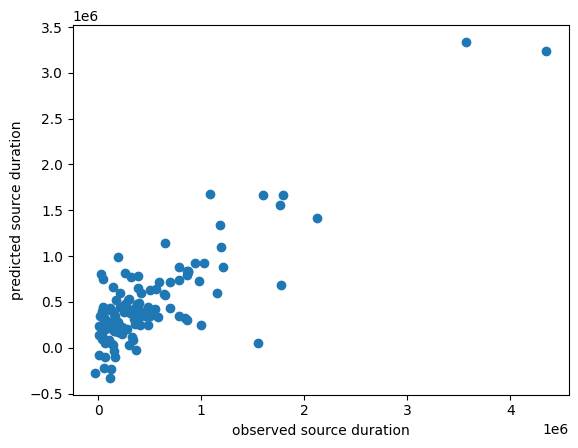

In [51]:
plt.scatter(source_labels, predicted_source_duration)
plt.xlabel('observed source duration')
plt.ylabel('predicted source duration')
print(f"MSE is: {mean_squared_error(source_labels, predicted_source_duration)}")

In [42]:
predicted_target_duration = reg.predict(target_reps)

MSE is: 4777659509473.228


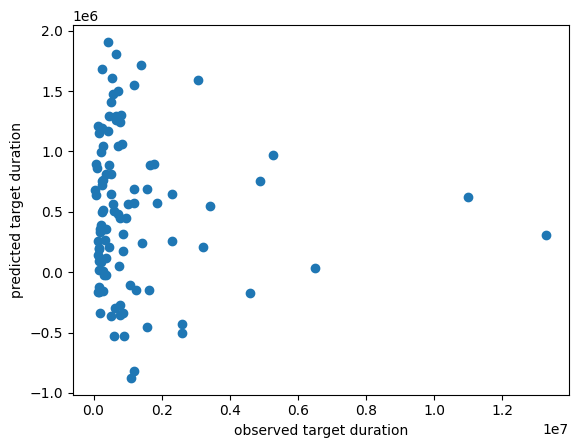

In [52]:
plt.scatter(target_labels, predicted_target_duration)
plt.xlabel('observed target duration')
plt.ylabel('predicted target duration')
print(f"MSE is: {mean_squared_error(target_labels, predicted_target_duration)}")

In [44]:
def trans_UOT(target_reps, source_reps, reg=0.1, reg_m=1):
    """ 
    Transport by unbalanced optimal transport
    
    :param float reg: entropy regularization param
    :param float reg_m: marginal relaxation paramter 

    :returns the transported target representations, the Wasserstein distance, \
        the tranport plan, and the maximum distance (diameter) between source and target embeddings
    -
    """

    source_measure = np.ones((source_reps.shape[0],))/source_reps.shape[0]
    target_measure = np.ones((target_reps.shape[0],))/target_reps.shape[0]

    M = ot.dist(source_reps, target_reps, metric='euclidean')
    print("M shape is:", M.shape)
    print("M is:", M)
    M /= M.max()
    coupling, ot_log = ot.unbalanced.sinkhorn_unbalanced(source_measure, target_measure, M, reg, reg_m, log=True)
    print("coupling is:", coupling)
    coupling = np.transpose(coupling)
    trans_target_reps = np.matmul(coupling, source_reps)
    wa_dist = ot.emd2(source_measure, target_measure, M)
    # print("wa_distance is:", wa_dist)

    # Compute the maximum distance between source representations and target representations
    return trans_target_reps, wa_dist, coupling, M.max()

In [45]:
ot.dist(source_reps, target_reps)

array([[34.32642769, 18.69328786, 17.49365106, ..., 15.52195146,
        19.58631918, 11.504043  ],
       [22.55196593,  5.47102458, 10.46131714, ..., 10.14545359,
        12.83511881,  5.7015393 ],
       [22.83137936,  6.88043826,  8.56993606, ...,  7.44851835,
        11.6698536 ,  5.86982611],
       ...,
       [19.83668146,  8.1639113 ,  8.30392721, ...,  7.55511547,
        12.51114199,  5.24667   ],
       [19.81539016,  5.16855217,  7.3122585 , ...,  7.26813841,
        10.57509565,  3.60776532],
       [22.03155873,  9.88336642, 11.49061561, ..., 11.3267346 ,
        14.74902044,  7.72775535]])

In [46]:
trans_target_reps, wa_dist, coupling, M_max = trans_UOT(target_reps, source_reps)

M shape is: (120, 100)
M is: [[5.85887597 4.32357351 4.18254122 ... 3.93979079 4.42564336 3.39176105]
 [4.74889102 2.33902214 3.23439595 ... 3.18519287 3.5826134  2.38778963]
 [4.77821927 2.62305895 2.92744531 ... 2.72919738 3.41611674 2.4227724 ]
 ...
 [4.45383896 2.8572559  2.88165355 ... 2.74865703 3.53710927 2.29056107]
 [4.4514481  2.273445   2.7041188  ... 2.69594852 3.25193722 1.89941183]
 [4.69377873 3.14378218 3.38978106 ... 3.36552145 3.84044534 2.77988405]]
coupling is: [[5.81797632e-05 5.93211295e-05 9.62794113e-05 ... 1.21219083e-04
  1.05362840e-04 1.34967318e-04]
 [6.02702841e-05 1.81183290e-04 8.16523681e-05 ... 8.09255667e-05
  7.84663911e-05 1.22641791e-04]
 [5.60162949e-05 1.22905023e-04 1.15010316e-04 ... 1.37050246e-04
  9.29048322e-05 1.13191434e-04]
 ...
 [8.96324879e-05 9.85839130e-05 1.30408660e-04 ... 1.43355473e-04
  8.57150574e-05 1.42818384e-04]
 [5.88928246e-05 1.32917609e-04 1.06400256e-04 ... 1.00237001e-04
  7.98889345e-05 1.51745396e-04]
 [9.43844997e-

In [47]:
ot_emd = ot.da.UnbalancedSinkhornTransport(reg_e=1e-1, reg_m=1)
ot_emd.fit(Xs=target_reps, Xt=source_reps)
trans_target_reps = ot_emd.transform(Xs=target_reps)

In [48]:
ot_emd.coupling_.shape

(100, 120)

In [49]:
predicted_trans_target_duration = reg.predict(trans_target_reps)

MSE is: 4570209743067.71


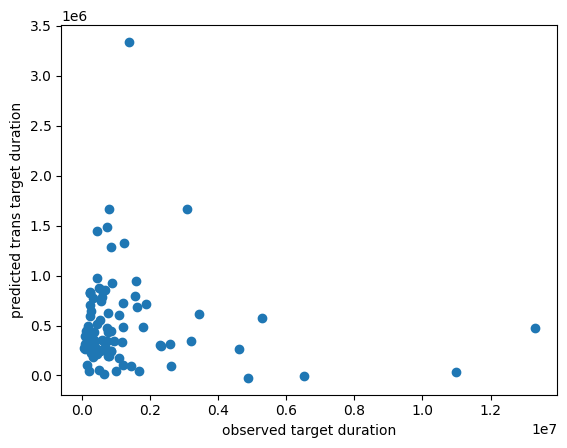

In [53]:
plt.scatter(target_labels, predicted_trans_target_duration)
plt.xlabel('observed target duration')
plt.ylabel('predicted trans target duration')
print(f"MSE is: {mean_squared_error(target_labels, predicted_trans_target_duration)}")